# Evaluation and Visualization Classification

## Import libraries

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    auc,
    precision_recall_curve,
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize


## Load model and data

In [2]:
# Load the best model
with open('best_model.pkl', 'rb') as f:
    best_model = pickle.load(f)

# Load data
with open('pca_data.pkl', 'rb') as f:
    pca_data = pickle.load(f)

X_raw = pca_data['X_raw']
y = pca_data['y']
class_labels = pca_data.get("label_names", None)

## Split data into training and test sets

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X_raw, y, test_size=0.2, random_state=42)

## Train and test model

In [4]:
# Train the best model on the full training set
print("\nTraining the Best Model on the Full Training Set...")
best_model.fit(X_train, y_train)

# Evaluate the best model on the training set
print("\nEvaluating the Best Model on the Training Set...")
y_train_pred = best_model.predict(X_train)
print("\nClassification Report for Training Set:")
print(classification_report(y_train, y_train_pred))
print("_" * 80)

# Evaluate the best model on the test set
print("\nEvaluating the Best Model on the Test Set...")
y_test_pred = best_model.predict(X_test)
print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_test_pred))


Training the Best Model on the Full Training Set...

Evaluating the Best Model on the Training Set...

Classification Report for Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.92      0.85      0.89        41
           2       0.86      0.92      0.89        39

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.92       120
weighted avg       0.93      0.93      0.92       120

________________________________________________________________________________

Evaluating the Best Model on the Test Set...

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      

## Plots

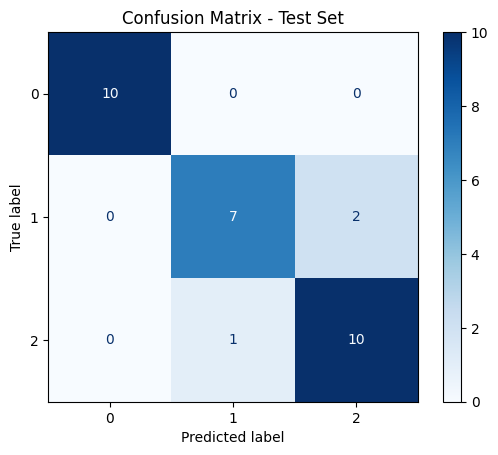

In [5]:
# Confusion Matrix for the Test Set
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Test Set")
plt.show()

In [6]:
# Check if the problem is binary classification
is_binary = len(np.unique(y)) == 2

# Only plot ROC and Precision-Recall curves if the problem is binary classification
if is_binary and hasattr(best_model, "predict_proba"):
    # Compute ROC curve and AUC
    y_proba = best_model.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_proba[:, 1])
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], "k--", lw=2)
    plt.title("ROC Curve - Test Set")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

    # Compute Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_proba[:, 1])
    plt.figure(figsize=(10, 8))
    plt.plot(recall, precision, label="Precision-Recall Curve")
    plt.title("Precision-Recall Curve - Test Set")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()
else:
    print("\nSkipping ROC and Precision-Recall curves as the problem is not binary classification.")

# Feature Importance (if applicable)
if hasattr(best_model.named_steps['classifier'], "feature_importances_"):
    feature_importances = best_model.named_steps['classifier'].feature_importances_
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(feature_importances)), feature_importances, alpha=0.7, color="skyblue")
    plt.title("Feature Importances")
    plt.xlabel("Features")
    plt.ylabel("Importance")
    plt.grid(True)
    plt.show()


Skipping ROC and Precision-Recall curves as the problem is not binary classification.
